機械学習特論 第6回 決定木 で アヤメのデータ、MNIST, Fashion-MNIST の分類を比較

In [1]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

In [3]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロードしてデータフレームを作成
def load_iris_data():
    data = load_iris()
    x = pd.DataFrame(data["data"],columns=data["feature_names"])
    y = pd.DataFrame(data["target"],columns=["target"])
    return x, y

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
def load_mnist_data():
    data = fetch_openml('mnist_784', version=1)
    _x = np.array(data['data'].astype(np.float32))
    _y = np.array(data['target'].astype(np.int32))
    _, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)
    return x, y

# Fashion-MNISTデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
def load_fashion_mnist_data():
    data = fetch_openml('Fashion-MNIST')
    _x = np.array(data['data'].astype(np.float32))
    _y = np.array(data['target'].astype(np.int32))
    _, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1, stratify=_y) 
    return x, y

# 一括処理のためにデータセットの辞書を作成
dataset = {'iris': load_iris_data(), 'mnist': load_mnist_data(), 'fashon-mnist': load_fashion_mnist_data()}

dataset: iris
x_train:112 x_test:38 y_train:112 y_test:38
max_depth=1, accuracy_score:  train data :  0.65179 test data :  0.71053
max_depth=2, accuracy_score:  train data :  0.96429 test data :  0.94737
max_depth=3, accuracy_score:  train data :  0.98214 test data :  0.97368
max_depth=4, accuracy_score:  train data :  1.0 test data :  0.94737
max_depth=5, accuracy_score:  train data :  1.0 test data :  0.94737


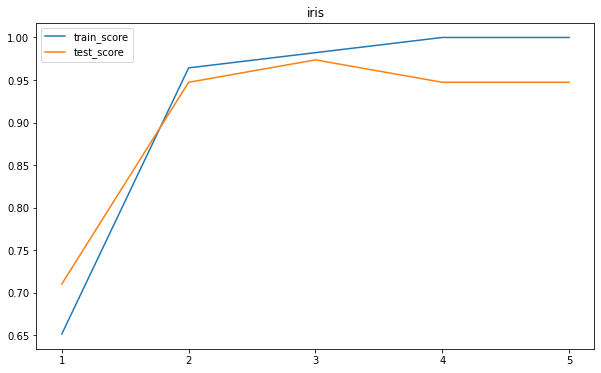

dataset: mnist
x_train:5250 x_test:1750 y_train:5250 y_test:1750
max_depth=1, accuracy_score:  train data :  0.20476 test data :  0.192
max_depth=2, accuracy_score:  train data :  0.33848 test data :  0.34171
max_depth=3, accuracy_score:  train data :  0.47619 test data :  0.46114
max_depth=4, accuracy_score:  train data :  0.62286 test data :  0.608
max_depth=5, accuracy_score:  train data :  0.69352 test data :  0.65257
max_depth=6, accuracy_score:  train data :  0.75943 test data :  0.70857
max_depth=7, accuracy_score:  train data :  0.81619 test data :  0.73486
max_depth=8, accuracy_score:  train data :  0.86705 test data :  0.74629
max_depth=9, accuracy_score:  train data :  0.91524 test data :  0.75029
max_depth=10, accuracy_score:  train data :  0.95333 test data :  0.75371
max_depth=11, accuracy_score:  train data :  0.97467 test data :  0.73886
max_depth=12, accuracy_score:  train data :  0.98819 test data :  0.74457
max_depth=13, accuracy_score:  train data :  0.99352 test da

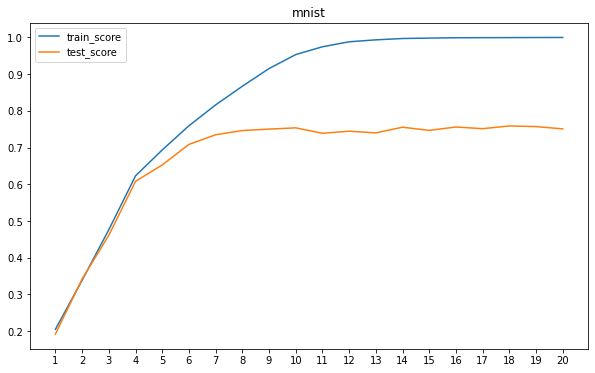

dataset: fashon-mnist
x_train:5250 x_test:1750 y_train:5250 y_test:1750
max_depth=1, accuracy_score:  train data :  0.20324 test data :  0.18571
max_depth=2, accuracy_score:  train data :  0.36267 test data :  0.34343
max_depth=3, accuracy_score:  train data :  0.51029 test data :  0.50057
max_depth=4, accuracy_score:  train data :  0.66019 test data :  0.64229
max_depth=5, accuracy_score:  train data :  0.72419 test data :  0.69714
max_depth=6, accuracy_score:  train data :  0.75733 test data :  0.716
max_depth=7, accuracy_score:  train data :  0.80286 test data :  0.74629
max_depth=8, accuracy_score:  train data :  0.84419 test data :  0.75714
max_depth=9, accuracy_score:  train data :  0.87848 test data :  0.76286
max_depth=10, accuracy_score:  train data :  0.91181 test data :  0.75943
max_depth=11, accuracy_score:  train data :  0.94076 test data :  0.76629
max_depth=12, accuracy_score:  train data :  0.96362 test data :  0.75657
max_depth=13, accuracy_score:  train data :  0.9758

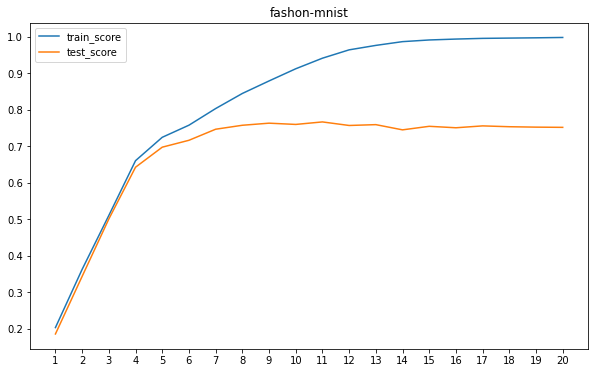

In [5]:
# 辞書に格納したデータセットそれぞれについて木の深さと決定木の性能確認
for _key in dataset.keys():
    print(f'dataset: {_key}')
    x, y = dataset[_key]
    # データを学習用と検証用に分割
    x_train, x_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.25, random_state=2) # 検証用データに25%を割当て
    print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

    # 木の深さを変えて学習した決定木の性能を学習用データと検証用データで確認
    _x = np.linspace(1, 7, 7) # グラフのx軸の設定 (1から7までの7点)
    train_score = [] # グラフ用のリスト
    test_score = [] # グラフ用のリスト
    previous_score = 0.0 # 検証用データに対する正解率を保存

    for i in range(20): # 木の深さは 1-7 (iに1を足して利用)
        # 決定木を学習データを利用して学習
        clf = DecisionTreeClassifier(max_depth=i+1, # 木の深さの最大
                                    random_state=2) # 乱数シード
        clf = clf.fit(x_train, y_train) 

        # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
        # 計算した性能はグラフ用のリストに格納
        predict_train = clf.predict(x_train)
        train_score.append(metrics.accuracy_score(y_train, predict_train))
        predict_test = clf.predict(x_test)
        test_score.append(metrics.accuracy_score(y_test, predict_test))
        print(f'max_depth={i+1}, accuracy_score: ', 
            f'train data : {train_score[i]: 0.5}', 
            f'test data : {test_score[i]: 0.5}')
        if previous_score == test_score[i]:
            break
        previous_score = test_score[i]

    # 木の深さに対する決定木の性能をグラフで表示
    _x = np.linspace(1, i+1, i+1) # グラフのx軸の設定
    plt.figure(figsize=[10,6])
    plt.title(_key)
    plt.plot(_x, train_score, label='train_score')
    plt.plot(_x, test_score, label='test_score')
    plt.xticks(_x)
    plt.legend()
    plt.show()